<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **11. Machine Learning: Regression** </center>


## **Outline**
1. [**Regression introduction**](#eje1)
2. [**Regression evaluation metrics**](#eje2)
3. [**Evaluating other dataset and methods**](#eje3)
4. [**Learning curves**](#eje4)



In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/la-conga-machinelearning-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *

#**1. Regression Introduction**

   - The regression is the problem of predicting a continuous quantity output for an example
   - Here we neet to estimate $\hat{y}$ and not $P(y|x)$

Now, we can try to imagine how many public bikes are demanded according to environmental factors. 


(729, 1) (729,)


,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


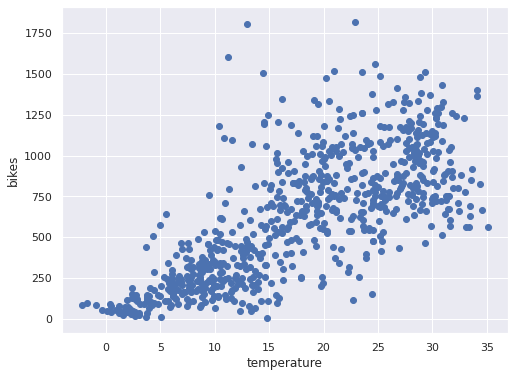

In [ ]:
#@title **code** Load a bikes demand dataset
#@markdown To easily understand regression problem, we will use only one feature, as follows:
bikes = pd.read_csv('data/bikes.csv')

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')


X_temp = bikes.values[:,[1]] 
y_count = bikes.values[:,-1] 
print(X_temp.shape, y_count.shape)

bikes.head()

In [ ]:
#@title **code** We can solve regression problem with same classification methods
#@markdown In such case, sklearn offer some alternatives like **DT regressor**
#@markdown We can use different max_depth boundaries

from sklearn.tree import DecisionTreeRegressor
import numpy as np

max_depth_1 =  2#@param {type:"number"}
max_depth_2 =  10#@param {type:"number"}

regressor = DecisionTreeRegressor(max_depth=max_depth_1)
regressorSA = DecisionTreeRegressor(max_depth=max_depth_2)
regressor.fit(X_temp, y_count)
regressorSA.fit(X_temp, y_count)

DecisionTreeRegressor(max_depth=10)

Now, we can ask to our model about the number of bikes, according to a temperature value. See the differences among both models.

In [ ]:
Temp_1 =  1#@param {type:"number"}
Temp_2 =  22#@param {type:"number"}

print("with Temp 1")
print("R1: ", regressor.predict([[Temp_1]]) )
print("R2: ", regressorSA.predict([[Temp_1]]) )

print("with Temp 2")
print("R1: ", regressor.predict([[Temp_2]]) )
print("R2: ", regressorSA.predict([[Temp_2]]) )

with Temp 1
R1:  [189.23183761]
R2:  [45.77380952]
with Temp 2
R1:  [769.08756039]
R2:  [848.13888889]


Text(0, 0.5, 'bikes')

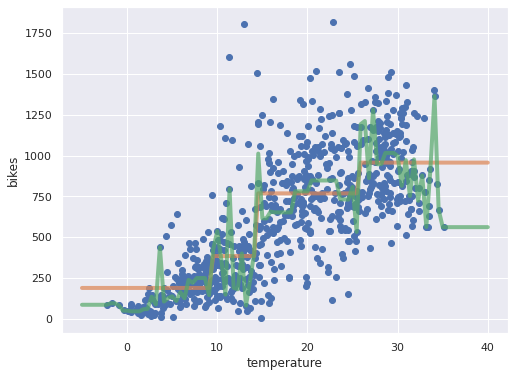

In [ ]:
#@title **code** Boundaries visualization
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction2')
plt.plot(xx, regressorSA.predict(xx), linewidth=4, alpha=.7, label='prediction50')
plt.xlabel('temperature')
plt.ylabel('bikes')

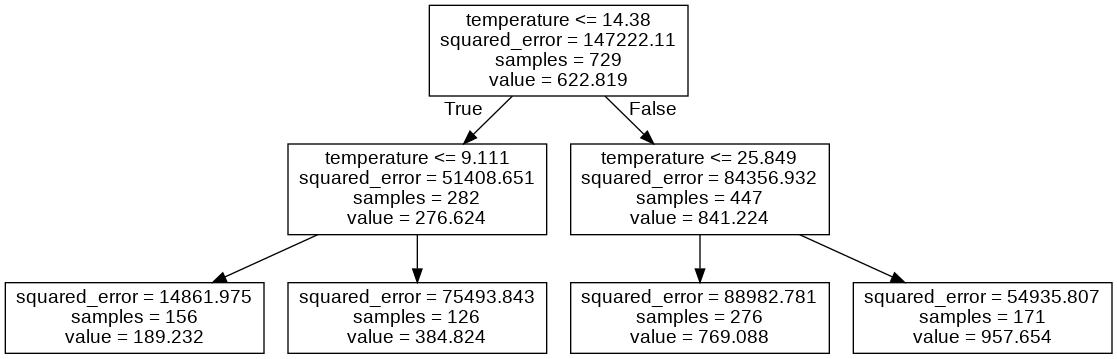

In [ ]:
#@title **code** Visualize the resultant tree
#!sudo apt-get install graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(regressor, out_file='tree_r.dot', feature_names=bikes.columns[[1]].values)
!dot -Tpng tree_r.dot > tree_r.png

Image(filename='tree_r.png') 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Which Tree is the best representation?
- How measure error in regression problems?
- Why it is not applicable classification metrics?


# 2. **Regression evaluation metrics**

There exist a lot of metrics to measure real-value differences in regression. Some examples are: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R Squared (R²), Adjusted R Squared (R²), Mean Square Percentage Error (MSPE), Mean Absolute Percentage Error (MAPE),  Root Mean Squared Logarithmic Error (RMSLE), among many others!. 

The most common metrics are described as follows: 

### **2.1 Mean Squared Error (MSE)**

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^{2} $$

- To Higher values, worse model performance
- Stand out outliers
- Useful if we have unexpected value to pay attention
- A single very bad prediction, will produce strong errors because the squaring (noisy data)
- It is easy to derivate for optimization process


### **2.2 Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^{2}} = \sqrt{MSE} $$

- Similar tendency that MSE
- To Higher values, worse model performance
- We can use MSE for ooptimization process...
- We give result on data range


### **2.3 Mean Absolute Erroe (MAE)**

$$MAE =\frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y_i}| $$

- In average all the  differences are weighted equally
- It is not sensitive to outliers
- The gradiend is a step function

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
#@title **code** We can now meause what it is the best DT-regression 
s = cross_val_score(regressor, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressorSA, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 30 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 68356.547 (+/- 18016.86824)
MSE depth: 30 100744.990 (+/- 24083.08591)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Compute MSE using all data for oth DT and return both errors: `mse_1_1, mse_1_1`
- Now, split the data in 80-20 and run the MSE and return `mse_2_1,mse_2_2`

- Run the experiment using whole features (`temperature	humidity	windspeed`) and 80-20 of split configuration
  - return ` mse_4_1, mse_4_2`

** **Not for califier**  
  - try to validate experiments with other metric
  - Implement your own version of mean_squared_error 

In [ ]:
#@title **code student**
def decision_tree(bikes, max_depth_1, max_depth_2):

  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.metrics import mean_squared_error
  import numpy as np

  np.random.seed(10)

  return mse_1_1, mse_1_2, mse_2_1, mse_2_2, mse_4_1, mse_4_2

# 3. **Evaluating other dataset and methods**

As in classification, there exist multiple methods that allows to solve the regression problem. Now, we will use a new dataset and we will try to sovel regression from different approaches. 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


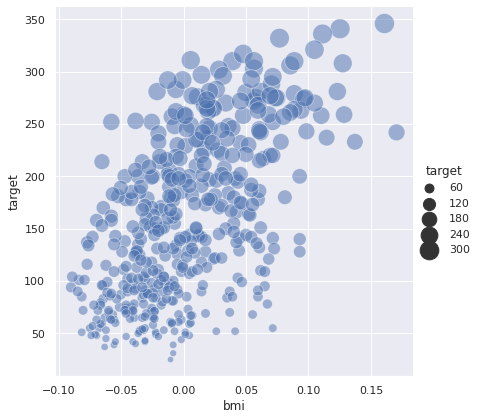

In [ ]:
#@title **code**
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()


variable_x = "age" #@param {type:"string"}
variable_y = "bmi" #@param {type:"string"}
variable_s = "target" #@param {type:"string"}


pandas_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
pandas_diabetes["target"] =  pd.Series(diabetes.target)


#sns.relplot(x=variable_x, y=variable_y, size=variable_s,
#            sizes=(40, 400), alpha=.5, palette="muted",
#            height=6, data=pandas_diabetes)




sns.relplot(x=variable_y, y=variable_s, size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pandas_diabetes)

pandas_diabetes.head(10)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Try to explore the regression methodology in a new dataset. For instance explore **DIABETES** dataset.

- Which is the task to solve?
- Which are the features?
- How is the performance of the implemented methods?

** Note. use `datasets.load_diabetes().DESCR` or web information to know about the dataset

In [ ]:
#@title **code** with DT
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(10)

X = pandas_diabetes.values[:,:-1] 
y = pandas_diabetes.values[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

mse_dt = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  6185.584
RMSE depth split data  78.648
MAE depth split data  59.584


In [ ]:
#@title **code** with RF
from sklearn.ensemble import RandomForestRegressor

np.random.seed(10)  
X = pandas_diabetes.values[:,:-1] 
y = pandas_diabetes.values[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))



MSE depth split data  3854.788
RMSE depth split data  62.087
MAE depth split data  50.986


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

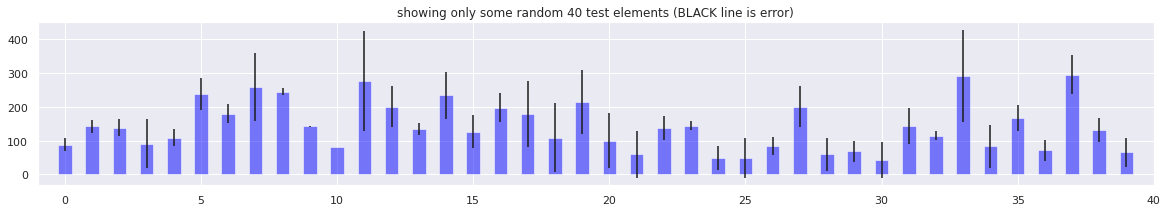

In [ ]:
#@title **code** Observing performance of independent results

plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Report performance with DT, SVR, and RandomForestregressor ?
  - to SVR use `from sklearn.svm import SVR`
  - Using train-test split and cross-validation
- Which is the best strategy in such problem?

In [ ]:
#@title **code student**
def svr(data, test_size):
  
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVR
  from sklearn.metrics import mean_squared_error
  import numpy as np

  np.random.seed(10)


  return mse

# 4. **Learning curves: Tunning parameters** <a name="eje3"></a>

One of the most critical points in ML is to fix best hyperparameters to deal with an **apropiate** performance. In such case a greedy scheme is demanding to find best data representation for a particular dataset and a particular strategy. 


For instance,  let's see the effect of increasing data using different K into the cross validation. 

In [ ]:
#@title **code** learning curve
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

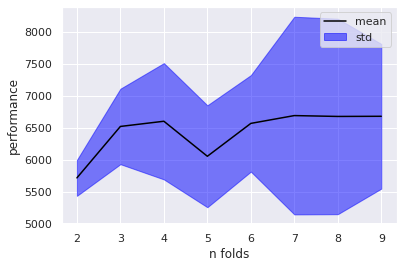

In [ ]:
#@title **code** using DTR

from sklearn.model_selection import cross_val_score
show_curve(DecisionTreeRegressor()) 

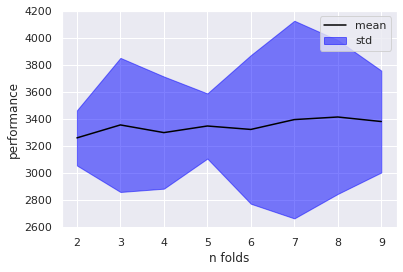

In [ ]:
#@title **code** using RFR
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Try with SVR 
- Validate the learning curve for different number of trees in a Random forest
- Valitate the performance of a SVR with polynomical kernel for different degrees. 

In [ ]:
#@title **code student**


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
